In [103]:
import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"
import plotly.express as px

# get the data

this is a list of valid uis

In [73]:
with open('../rico_sca_filter.txt') as f:
    rico_sca_filter = f.read().split('\n')
    rico_sca_filter.remove('')

    
rico_sca_filter = map(lambda ui_id: int(ui_id.replace('.json', '')), rico_sca_filter)
rico_sca_filter = set(rico_sca_filter)


print(len(rico_sca_filter))

24598


ui details data frame filtered by valid ui list

In [77]:
ui_details = pd.read_csv('../rico/metadata/ui_details.csv')
ui_details = ui_details[
    ui_details['UI Number'].isin(rico_sca_filter)
]
ui_details.head()

,UI Number,App Package Name,Interaction Trace Number,UI Number in Trace
2,2,yong.app.videoeditor,0,221
3,3,yong.app.videoeditor,0,1289
4,4,yong.app.videoeditor,0,125
6,6,yong.app.videoeditor,0,1462
8,8,yong.app.videoeditor,0,271


In [89]:
ui_details['UI Number'].count(), len(ui_details['App Package Name'].unique())

(24598, 6599)

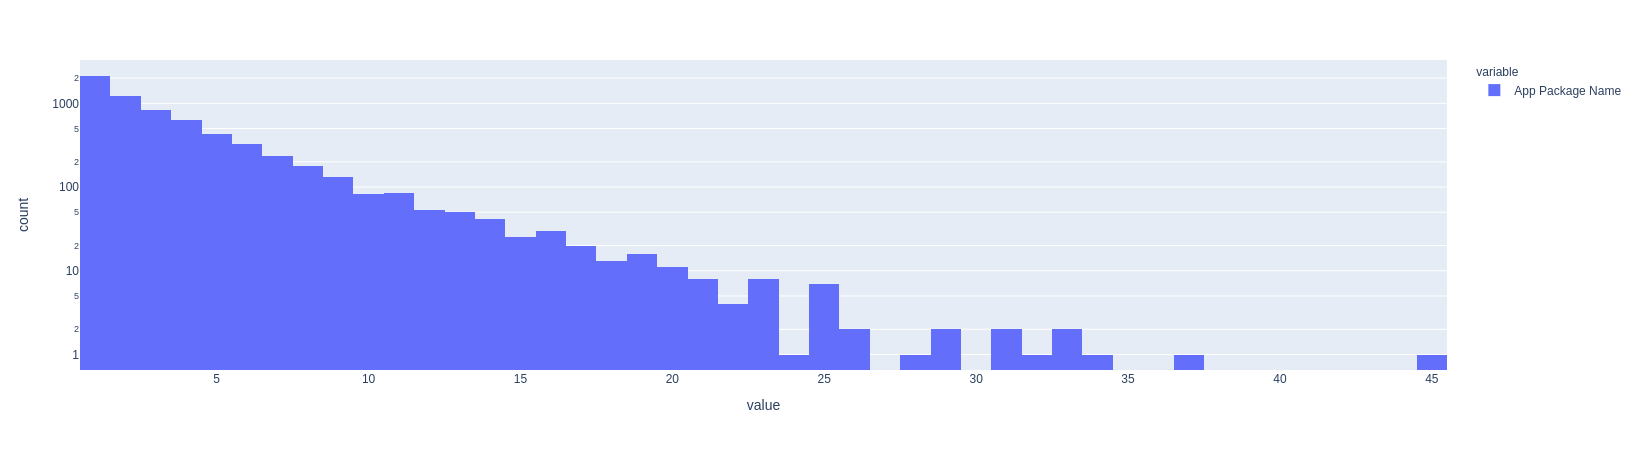

In [109]:
fig = ui_details['App Package Name'].value_counts().hist()
fig.update_yaxes(type="log")
fig.show()

app details data frame filtered by valid ui list

In [110]:
app_details = pd.read_csv('../rico/metadata/app_details.csv')
app_details = app_details[
    app_details['App Package Name'].isin(ui_details['App Package Name'])
]
app_details.head()

,App Package Name,Play Store Name,Category,Average Rating,Number of Ratings,Number of Downloads,Date Updated,Icon URL
0,com.guideme.movieboxa,Movie‍Box Show Reference,Books & Reference,3.4,494,"100,000 - 500,000","March 28, 2017",https://lh3.googleusercontent.com/LsbPA6hvtk2t...
2,com.diaohs.cola,Eye Filter (Blue light filter),Health & Fitness,4.6,2606,"100,000 - 500,000","November 12, 2016",https://lh3.googleusercontent.com/DX-XZCMORuPZ...
6,com.bouncetv.apps.network,Bounce TV,Entertainment,4.4,4294,"100,000 - 500,000","February 27, 2017",https://lh3.googleusercontent.com/9kqOg4akMLBh...
7,com.allinone.callerid,Showcaller - Caller ID & Block,Communication,4.4,10686,"1,000,000 - 5,000,000","May 4, 2017",https://lh3.googleusercontent.com/hYrUsO4TJuQ-...
8,com.gotv.nflgamecenter.us.lite,NFL Mobile,Sports,4.1,403591,"50,000,000 - 100,000,000","May 3, 2017",https://lh3.googleusercontent.com/sh3xWtVZ4yk1...


In [111]:
app_details.describe()

,Average Rating
count,6599.000000
mean,4.128626
std,0.395600
min,-1.000000
25%,3.900000
50%,4.200000
75%,4.400000
max,5.000000


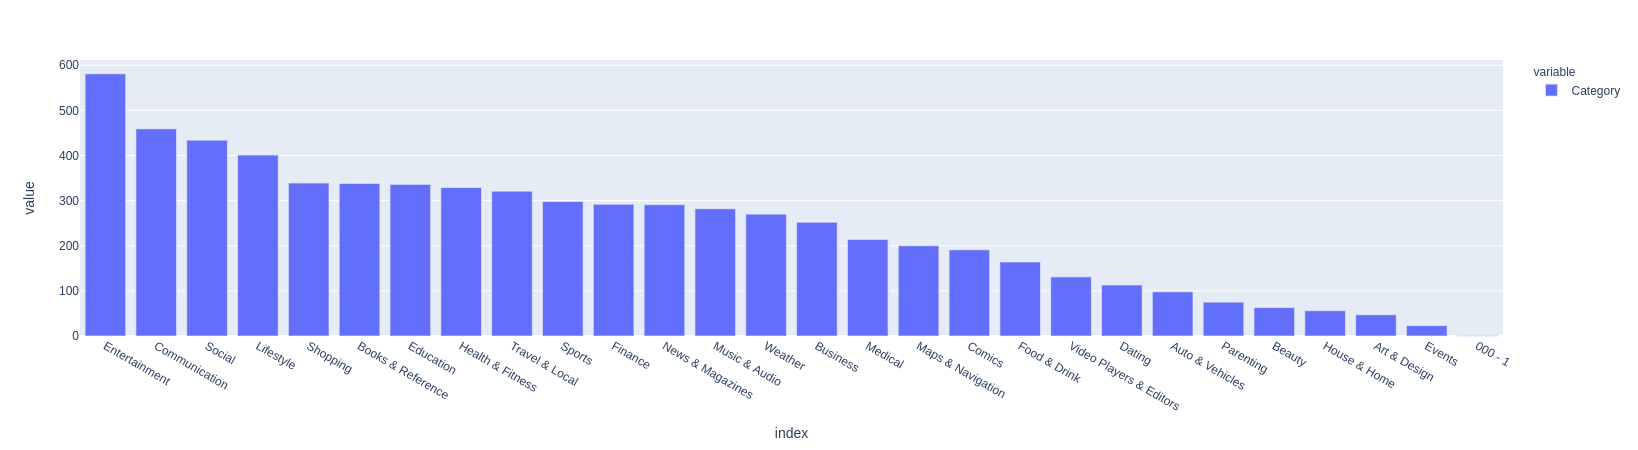

In [112]:
app_details['Category'].value_counts().plot.bar()